# <center> FIFA World Cup 2022 Analysis

#### Table of Contents

1. Introduction

2. Background, Aims, and Objectives   

    2.1 Background    
                                  
    2.2 Aims & Objectives    


3. Datasets     

    3.1 Datasets Selection  

    3.2 Datasets Requirements 

    3.3 Limits & Constraints of the Datasets

    3.4 Ethical Considerations

    3.5 Data Cleaning 
    

4. Data Modeling

    4.1 E/R Model

    4.2 Data Analysis
    

5. Database

    5.1 Database SQL
        
6. Web Application

7. References

## 1 Introduction

FIFA World Cup 2022 was one of the biggest headlines of 2022. All football fans across the world tuned in to see which country would take championship home this year. After watching a few world cup matches of my home country, I wondered about the different teams and if it is possible to predict the matches with statistical certainty. This inspired me to look for FIFA World Cup 2022 databases and analyze it. 

## 2 Background, Aims, and Objectives

### 2.1 Background
FIFA World Cup is a international football tournament that is held every four years. In the year 2022, Qatar hosted this event from 20 November to 18 December.  In 2018, France won the championship and was defending its title in 2022. There's usually total of 32 teams from 5 confederations representing their countries in these tournaments. The tournament is divided into Group Stage and Knockout Stage. In the Group Stage, the 32 teams are divided in to eight groups named from A-H each consisting of four nations. In this bracket format, the top two teams in each group are advanced to Knockout Stage and then later to Round of 16, Quarterfinals, Semifinals, and Finals. [1][2]

### 2.2 Aims & Objectives 
In this project, I am looking to learn about World Cup and football in general. As someone who has never been following worldcup or any other sports closely, I wanted to learn about different teams, and their performance. I wanted to take an exploratory approach to see if I notice any patterns, trends, or abnormalities in the worldcup statistics. However, to begin with, I had a few questions about which team performed best in this world cup, how much one player's performance has an impact on the team's overall performance, and which groups generally did the best. 

## 3 Datasets


### 3.1 Datasets Selection  

I chose the following datasets found on Kaggle: 

- FIFA World Cup 2022 Team Data [3]
- FIFA World Cup 2022 Group Data [4]
- FIFA World Cup 2022 Player Data [5]
- FIFA World Cup 2022 Player - Goal Keepers Data [5]

The datasets in this list are taken from Sport Reference and downloaded in CSV file format [6].
    



### 3.2 Datasets Requirements 

I chose these datasets since they met the following requirements immediately: open and normalised. The datasets were all open source since they were available on open to public use on official kaggle website. Also later, I analyze how all the datasets were also normalized. 

All the dataset were very large i.e. original team dataset had over 100 columns. The level of the detail was very high to the point that I reduced the number of columns in all the datasets so that it would be easier to query the database and also to analyze only a few features instead of all the features - that would make the analysis much more complicated, not efficient and potentially cause more errors in the analysis. The website that the dataset was downloaded from seems legitimate and  official as well. In addition to world cup data, it has sports specific data on all major tournaments. This makes the data much more high quality and reliable. The four datasets are also all dependent to each other and interrelated since there are eight groups and  four teams in each group and each team has eleven player and one goal keeper. This makes these datasets exceptionally well suited for the type of analysis I intend to do. Since the datasets are all open source and also not difficult to create if you follow the tournaments closely, they also check the discoverability requirement. 
Quality, level of detail, documentation, interrelation, use, discoverability)

### 3.3 Limits & Constraints of the Datasets

The datasets don't completely reflect all of the angles an event such as worldcup can be analyzed from. In a small project such as this, it suffices however to create a meaningful analysis you need a larger dataset and proper computational resources. I would personally be more curious to analyze the original team_stats dataset if I had the computational resources to do so. Another constraint of these datasets is that they by themselves can't help predict future games and create good models. To create a proper model, it would be necessary to also analyze older world cup statistics as well. This way, we could actually see a pattern that has been observed over years. 

### 3.4 Ethical Considerations

There also many ethical considerations. As much as the source of the datasets seems legitimate the user that posted them on kaggle might have done so without the original source's permission. Also, the world cup 2022 had many human rights abuses reports caused by the host country Qatar that even though it's not reflected in the dataset or data analysis it is worth noting and keeping in mind. 

### 3.5 Data Cleaning

In [28]:
import pandas as pd 
import numpy as np
import csv

In [29]:
#importing the csv files 
team_stats = pd.read_csv('original_team_stats.csv')
group_stats = pd.read_csv('original_group_stats.csv')
player_stats = pd.read_csv('original_player_stats.csv')
keepers_stats = pd.read_csv('original_keepers_stats.csv')

Looking for datasets shapes and information to see if there are any abnormalities in the dataset to account for. 

In [30]:
team_stats.shape
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 189 entries, team to aerials_won_pct
dtypes: float64(59), int64(129), object(1)
memory usage: 47.4+ KB


As you can see team_stats is a huge dataset that I will reduce to only a few columns to let it become more manageable and easier to analyze.

In [31]:
group_stats.shape
group_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  32 non-null     int64  
 1   group_name                  32 non-null     int64  
 2   standing                    32 non-null     int64  
 3   team                        32 non-null     object 
 4   matches_played              32 non-null     int64  
 5   wins                        32 non-null     int64  
 6   draws                       32 non-null     int64  
 7   losses                      32 non-null     int64  
 8   goals_scored                32 non-null     int64  
 9   goals_against               32 non-null     int64  
 10  goal_difference             32 non-null     int64  
 11  points                      32 non-null     int64  
 12  expected_goal_scored        32 non-null     float64
 13  exp_goal_conceded           32 non-nu

In [32]:
player_stats.shape
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player                    680 non-null    object 
 1   position                  680 non-null    object 
 2   team                      680 non-null    object 
 3   age                       680 non-null    object 
 4   club                      679 non-null    object 
 5   birth_year                680 non-null    int64  
 6   games                     680 non-null    int64  
 7   games_starts              680 non-null    int64  
 8   minutes                   680 non-null    int64  
 9   minutes_90s               680 non-null    float64
 10  goals                     680 non-null    int64  
 11  assists                   680 non-null    int64  
 12  goals_pens                680 non-null    int64  
 13  pens_made                 680 non-null    int64  
 14  pens_att  

In [33]:
keepers_stats.shape
keepers_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player                      41 non-null     object 
 1   position                    41 non-null     object 
 2   team                        41 non-null     object 
 3   age                         41 non-null     object 
 4   club                        41 non-null     object 
 5   birth_year                  41 non-null     int64  
 6   gk_games                    41 non-null     int64  
 7   gk_games_starts             41 non-null     int64  
 8   gk_minutes                  41 non-null     int64  
 9   minutes_90s                 41 non-null     float64
 10  gk_goals_against            41 non-null     int64  
 11  gk_goals_against_per90      41 non-null     float64
 12  gk_shots_on_target_against  41 non-null     int64  
 13  gk_saves                    41 non-nu

In [34]:
player_stats.columns

Index(['player', 'position', 'team', 'age', 'club', 'birth_year', 'games',
       'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists',
       'goals_pens', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red',
       'goals_per90', 'assists_per90', 'goals_assists_per90',
       'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'npxg',
       'xg_assist', 'npxg_xg_assist', 'xg_per90', 'xg_assist_per90',
       'xg_xg_assist_per90', 'npxg_per90', 'npxg_xg_assist_per90'],
      dtype='object')

In [35]:
group_stats.columns

Index(['Unnamed: 0', 'group_name', 'standing', 'team', 'matches_played',
       'wins', 'draws', 'losses', 'goals_scored', 'goals_against',
       'goal_difference', 'points', 'expected_goal_scored',
       'exp_goal_conceded', 'exp_goal_difference',
       'exp_goal_difference_per_90'],
      dtype='object')

In [36]:
team_stats.columns

Index(['team', 'players_used', 'avg_age', 'possession', 'games',
       'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists',
       ...
       'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals',
       'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct'],
      dtype='object', length=189)

In [37]:
keepers_stats.columns

Index(['player', 'position', 'team', 'age', 'club', 'birth_year', 'gk_games',
       'gk_games_starts', 'gk_minutes', 'minutes_90s', 'gk_goals_against',
       'gk_goals_against_per90', 'gk_shots_on_target_against', 'gk_saves',
       'gk_save_pct', 'gk_wins', 'gk_ties', 'gk_losses', 'gk_clean_sheets',
       'gk_clean_sheets_pct', 'gk_pens_att', 'gk_pens_allowed',
       'gk_pens_saved', 'gk_pens_missed', 'gk_pens_save_pct'],
      dtype='object')

Looking for what's common between the columns in each dataset:

In [38]:
list(set(player_stats.columns) & set(group_stats.columns) & set(team_stats.columns) & set(keepers_stats.columns) )

['team']

In [39]:
list(set(player_stats.columns) & set(group_stats.columns))

['team']

In [40]:
list(set(group_stats.columns) & set(team_stats.columns))

['team']

In [41]:
list(set(player_stats.columns) & set(keepers_stats.columns)) 

['player', 'age', 'club', 'minutes_90s', 'team', 'position', 'birth_year']

In [42]:
list(set(player_stats.columns) & set(team_stats.columns))


['assists',
 'xg_assist',
 'xg_per90',
 'npxg',
 'games_starts',
 'minutes_90s',
 'xg_xg_assist_per90',
 'goals_pens_per90',
 'cards_yellow',
 'npxg_xg_assist',
 'goals_assists_per90',
 'xg_assist_per90',
 'minutes',
 'pens_att',
 'npxg_per90',
 'npxg_xg_assist_per90',
 'team',
 'goals_per90',
 'xg',
 'pens_made',
 'goals_assists_pens_per90',
 'assists_per90',
 'goals_pens',
 'games',
 'goals',
 'cards_red']

In [43]:
selected_features = ['team', 'games',
       'games_starts', 'minutes', 'goals', 'assists',
       'goals_pens', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red']

In [44]:
team_stats = team_stats[ selected_features + ['players_used']]
player_stats = player_stats[['player', 'position'] + selected_features]
keepers_stats = keepers_stats[['player', 'team', 'position', 'club','gk_wins','gk_ties','gk_losses']]

In [45]:
group_stats=group_stats.drop(['Unnamed: 0', 'expected_goal_scored', 'exp_goal_conceded',
       'exp_goal_difference', 'exp_goal_difference_per_90'], axis = 1)

In [46]:
# exporting the datasets to csv files:
team_stats.to_csv('team_stats.csv')
player_stats.to_csv('player_stats.csv')
keepers_stats.to_csv('keepers_stats.csv')
group_stats.to_csv('group_stats.csv')

## 4 Data Modeling

### 4.1 E/R Model

Here's the final E/R model for the three datasets team_stats, player_stats and group_stats using LucidChart. As you can see below, there are four entities 'group', 'player', 'keeper', and 'team'. A group consists of more than one team hence the many relationship however a team can only belong to one and only one group therefore the one and only one relationship. A player can be only in one team in this tournament therefore the one and only one relationship however a team has definitely more than one player therefore the many relationship. The relationship between player and group is similar to relationship that team and group have.  A keeper players with multiple players but players only play with or is in a team with one keeper. A group has multiple keeper players but a keeper is only in one and only one group. A team has one and only one keeper and vice vera. 

There are ten common attributes between player entity and team entity: 'team', 'games','games_starts', 'minutes', 'goals', 'assists', 'goals_pens', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red'. Each of these attributes have zero or many values considering both player and team entities. However even though 'avg_age' and 'players_used' can have one or many teams with similar values but each team has only one and only one  'avg_age' or 'players_used' values. Similar relationship exists between 'age' and player. 

All the attributes group has except 'standing' or rank have zero or many relationships both ways. Since a group can have zero or multiple of each attribute. However a group has definitely more than 1 standings, therefore many relationship and each standing exists in all the groups so again the many to many relationship. 

Attributes 'minutes_90s', 'passes', 'gk_wins', 'gk_losses', 'gk_ties' and 'losses' and 'points' have zero or many relationships to keeper and vice versa. A club has only one keeper and a keeper has only one club. A position can have one keeper or none however a keeper has exactly one position. 

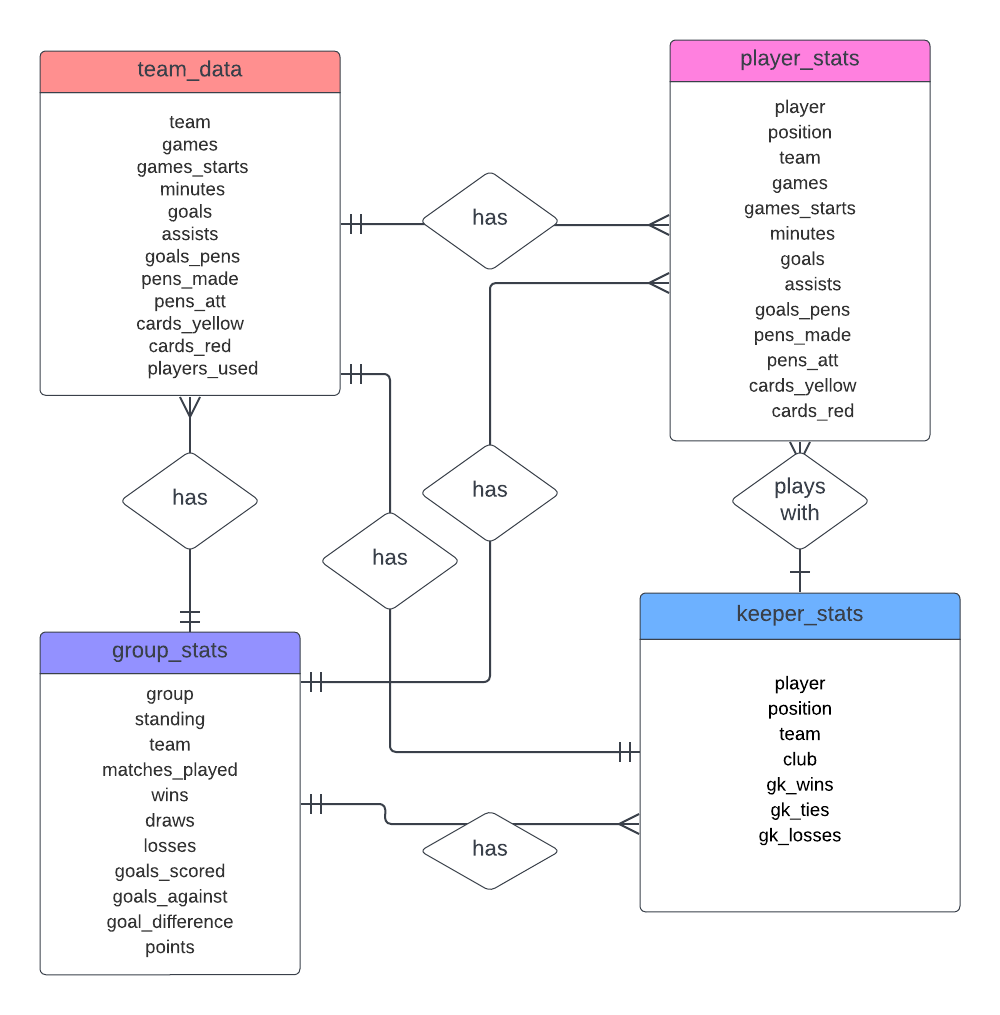

In [47]:
from IPython.display import Image, display
display( Image(filename='er_tables.png', width = 600)) 


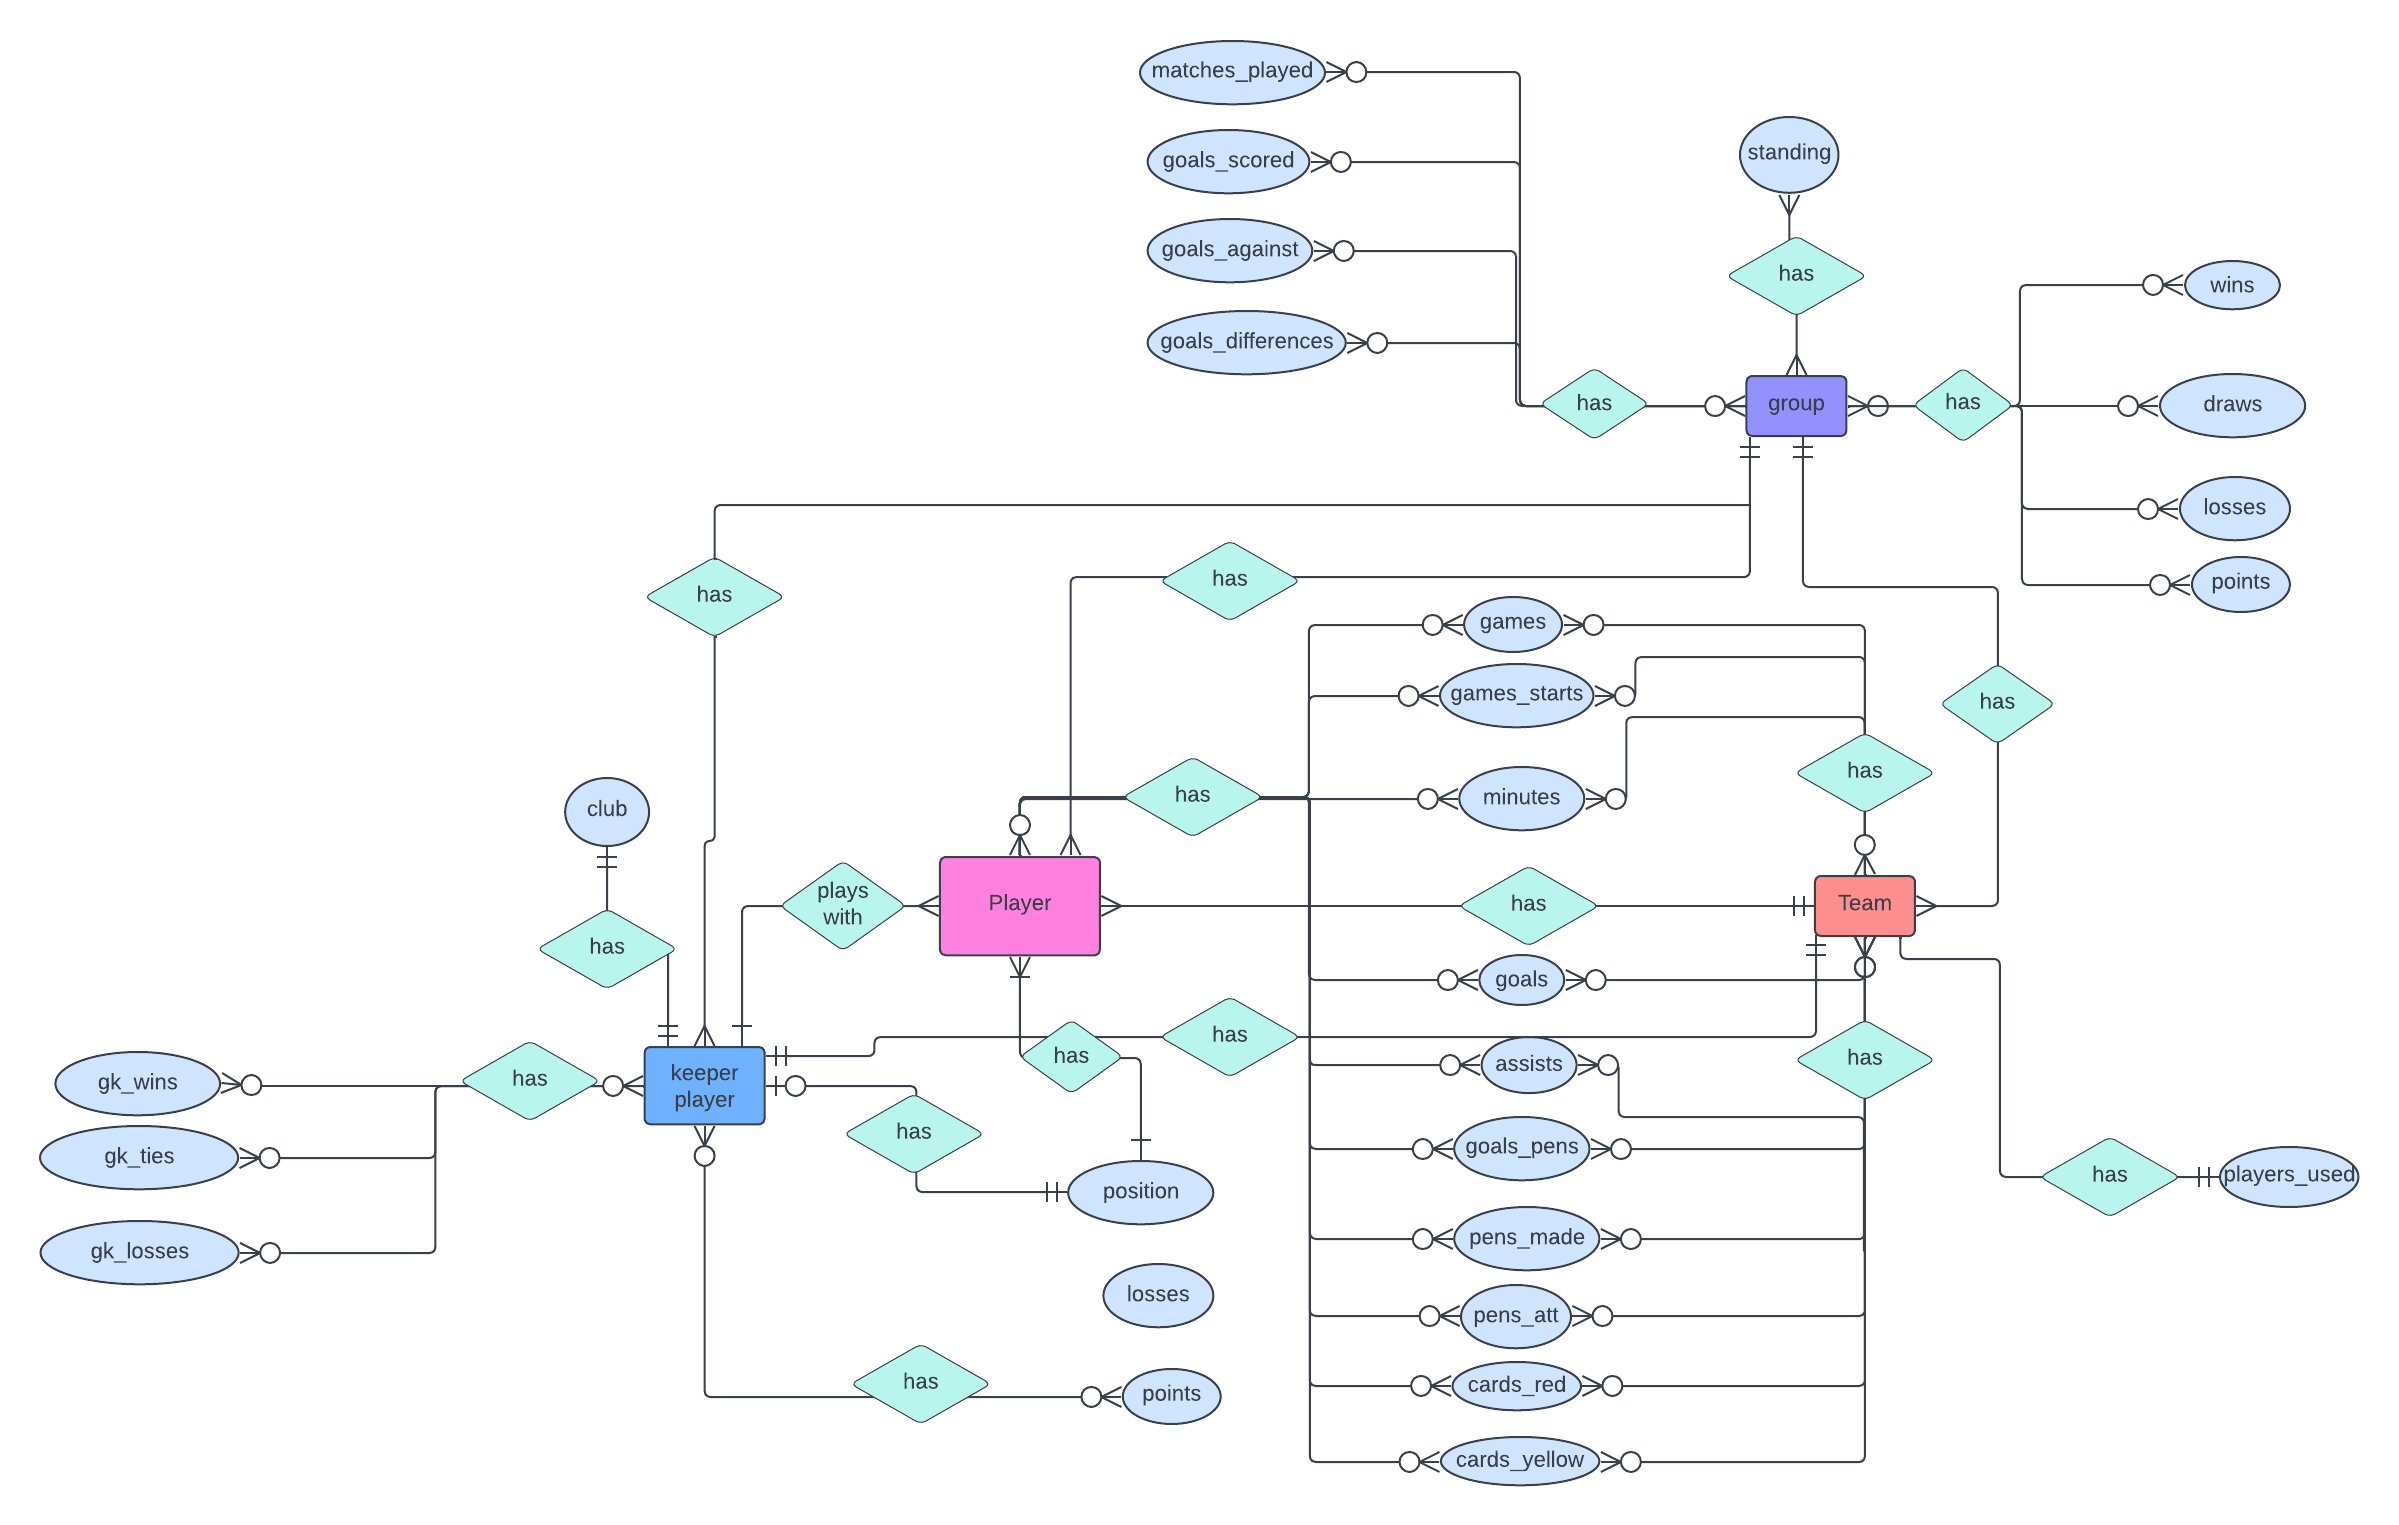

In [48]:
display( Image(filename='er_model.png', width = 1000)) 

### 4.2 Normalization  

In [49]:
team_stats[:3]

team  games  games_starts  minutes  goals  assists  goals_pens  \
0  Argentina      7            77      690     15        8          11   
1  Australia      4            44      360      3        3           3   
2    Belgium      3            33      270      1        1           1   

   pens_made  pens_att  cards_yellow  cards_red  players_used  
0          4         5            17          0            24  
1          0         0             7          0            20  
2          0         0             5          0            20

In [50]:
group_stats[:3]

group_name  standing         team  matches_played  wins  draws  losses  \
0           1         1  Netherlands               3     2      1       0   
1           1         2      Senegal               3     2      0       1   
2           1         3      Ecuador               3     1      1       1   

   goals_scored  goals_against  goal_difference  points  
0             5              1                4       7  
1             5              4                1       6  
2             4              3                1       4

In [51]:
player_stats[:3]

player position       team  games  games_starts  minutes  goals  \
0         Aaron Mooy       MF  Australia      4             4      360      0   
1       Aaron Ramsey       MF      Wales      3             3      266      0   
2  Abdelhamid Sabiri       MF    Morocco      5             2      181      0   

   assists  goals_pens  pens_made  pens_att  cards_yellow  cards_red  
0        0           0          0         0             1          0  
1        0           0          0         0             1          0  
2        1           0          0         0             1          0

In [52]:
keepers_stats[:3]

player     team position        club  gk_wins  gk_ties  \
0        Aimen Dahmen  Tunisia       GK  CS Sfaxien        1        1   
1  Alireza Beiranvand  IR Iran       GK  Persepolis        0        0   
2             Alisson   Brazil       GK   Liverpool        2        1   

   gk_losses  
0          1  
1          1  
2          0

#### 4.2.1 1NF


All the tables above are 1NF since there's no ordering in rows or columns and there are no duplicate rows. Each table is a relation. All the attributes are scalar values and no column is an object without any hidden components. Looking at E/R diagrams we can see that each attribute (functional dependency) each functional dependency in each table depends on one primary key. 


#### 4.2.2 2NF


All the tables above are 2NF since firstly they are 1NF.
The primary keys for each table are: 
  - team_stats primary key : team
  - team_stats attributes:  'games', 'games_starts', 'minutes', 'goals', 'assists', 'goals_pens', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red',
    'players_used'
  - group_stats primary key: team 
  - group_stats attributes : 'group', 'standing', 'matches_played', 'wins', 'draws', 'losses','goals_scored', 'goals_against', 'goal_difference', 'points'
  - player_stats primary key : player
  - player_stats attributes:  'age', 'position', 'team', 'games', 'games_starts', 'minutes','goals', 'assists', 'goals_pens', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red'
  - keeper_stats primary key : player
  - keeper_stats attributes:  'team', 'position', 'club', 'gk_wins','gk_ties', 'gk_losses'

 Every attribute depends on the primary key and only the primary key. They do not depend on any other attribute but the primary key. As you can see above we cannot reduce any of the attributes to anything else.

#### 4.2.3 3NF


All the tables are 2NF and 1NF which is the first condition for a 3NF normalization condition. Each attribute shown in section 4.3.2 also directly depends on the primary key and only the primary key. The tables are at least 3NF so there's no need to further normalize for data analysis in this case.

#### 4.2.4 BCNF 
If a table meets 3NF requirements then it meets BCNF unless in very specific condition since BCNF is a strictly a stronger form of 3NF. Therefore all the tables meet the BCNF requirements. 

#### 4.2.4 4NF

The tables aren't 4Nf since they aren't repetitive rows so there are no multi-value dependencies. I didn't want to normalize further since there was no need to add multi-value dependencies since there are none. 

### 4.3 Data Analysis

In [53]:
import plotly.express as px

fig = px.bar(team_stats, x='team', y='goals',color='cards_red',title='Teams vs. Goals in comparison to red cards')
fig.update_layout(title_text='Teams vs. Goals  ',template='seaborn')
fig.show()

In [54]:
fig = px.bar(team_stats, x='team', y='goals',color='cards_yellow',title='Teams vs. Goals in comparison to yellow cards')
fig.update_layout(title_text='Teams vs. Goals  ',template='seaborn')
fig.show()

This is an interesting result. There is no immediate relationship between number of red cards and the number of goals but there seems to be a correlation between the number of yellow cards and the number of goals by a team. Argentina is a prime example of this, with 15 goals and 17 yellow cards holding the second most number of goals and second most number of yellow cards. England is an exception with 8 goals and only one yellow card. The teams seemed to have at most one red card or else zero. It 

In [55]:
fig = px.bar(team_stats.sort_values('players_used', ascending = True), 
             y="team", x="players_used",color=None,
             width=750, 
             height=600,
             )
fig.update_layout(
             template='ggplot2',
             title="<b>Number of Players Used <b>",
             titlefont={'size':24},
)

colors = ['lightpink',] * 32 

fig.update_traces(marker_color=colors, marker_line_color=None,
                  marker_line_width=2.5, opacity=None)
fig.show()

In [56]:
fig = px.bar(group_stats, x='team', y='wins',color='standing',title='Teams vs. Wins in comparison to yellow cards')
fig.update_layout(title_text='Teams vs. Goals  ',template='seaborn')
fig.show()

As you can see above naturally the teams with mor wins have better standing (1). Qatar, Wales, Denmark, Canada, and Serbia had zero wins that's why it doesn't show up in the bar chart. 

In [57]:
fig = px.bar(player_stats, x='team', y='goals',color='position',title='Teams vs. Goals in comparison to player position')
fig.update_layout(title_text='Teams vs. Goals  ',template='seaborn')
fig.show()

This is such an insightful data visualization. It clearly shows that Wing Forwards (FW) position has the most goals naturally since they play the furthest up the pitch according to wikipedia.Right after FWs, some goal keepers were able to score some goals as well, which makes looking into Goal Keepers dataset even more interesting. From the bar chart above, I learned that France has one of the best FW players with Argentina's FWs as their competitor! 

In [58]:
fig = px.bar(keepers_stats, x='team', y='gk_wins',color='club',title='Teams vs. Wins in comparison to yellow cards')
fig.update_layout(title_text='Teams vs. Goals  ',template='seaborn')
fig.show()

The graph above immediately vouches for Tottenham goal keepers to have a higher win rate with Aston Villa of Argentina following them as expected. Everton, Porto, and Heerenveen are the follow ups. 

## 5 Database

###   5.1 Database SQL


Here are a list of all the SQL commands used to create the database and import the datasets into the database and query the database. 

In [59]:
SHOW DATABASES;

SyntaxError: invalid syntax (Temp/ipykernel_25732/1921087095.py, line 1)

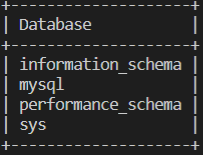

In [ ]:
CREATE DATABASE worldcup2022;

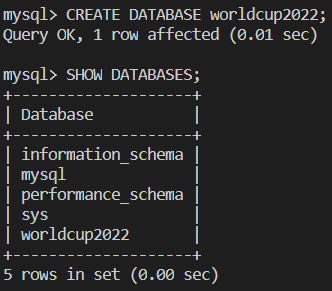

In [ ]:
USE worldcup2022;

In [ ]:
CREATE TABLE team_stats (
	team varchar(255),
	games int,
	games_starts int,
	minutes int,
	goals int,
	assists   int    ,
	goals_pens int,
	pens_made int,
	pens_att int,
	cards_yellow int,
	cards_red int,
    players_used int,
	PRIMARY KEY (team)
);

In [ ]:
CREATE TABLE player_stats (
	player varchar(255),
	position varchar(255),
	team varchar(255),
	games int,
	games_starts int,
	minutes int,
	goals  int,
	assists int,
	goals_pens int,
	pens_made int,
	pens_att int,
	cards_yellow int,
	cards_red int,
	PRIMARY KEY (player)
);

In [ ]:
CREATE TABLE group_stats (
	group_name int, 
	standing int, 
	team varchar(255),
	matches_played int,
	wins int,
	draws int, 
	losses int, 
	goals_scored int,
	goals_against int,
	goal_difference int,
	points int,
	PRIMARY KEY (team)
);

In [ ]:
CREATE TABLE keepers_stats (
	player varchar(255),
    team varchar(255),
	position varchar(255),
	club varchar(255),
	gk_wins int,
	gk_ties int,
	gk_losses int,
	PRIMARY KEY (player)
);

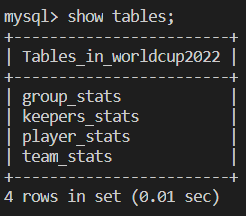

In [ ]:
/* import team_stats*/
LOAD DATA
    INFILE '/home/coder/project/team_stats.csv'
    REPLACE
    INTO TABLE team_stats
    FIELDS
        TERMINATED BY ','
        OPTIONALLY ENCLOSED BY '"'
        ESCAPED BY '"'
    IGNORE 1 ROWS;

In [ ]:
/* import group_stats*/
LOAD DATA
    INFILE '/home/coder/project/group_stats.csv'
    REPLACE
    INTO TABLE group_stats
    FIELDS
        TERMINATED BY ','
        OPTIONALLY ENCLOSED BY '"'
        ESCAPED BY '"'
    IGNORE 1 ROWS;

In [ ]:
/* import players_stats*/
LOAD DATA
    INFILE '/home/coder/project/player_stats.csv'
    REPLACE
    INTO TABLE player_stats
    FIELDS
        TERMINATED BY ','
        OPTIONALLY ENCLOSED BY '"'
        ESCAPED BY '"'
    IGNORE 1 ROWS;

In [ ]:
/* import keepers_stats*/
LOAD DATA
    INFILE '/home/coder/project/keepers_stats.csv'
    REPLACE
    INTO TABLE keepers_stats
    FIELDS
        TERMINATED BY ','
        OPTIONALLY ENCLOSED BY '"'
        ESCAPED BY '"'
    IGNORE 1 ROWS;

In [ ]:
SELECT * FROM team_stats;

In [ ]:
SELECT * FROM player_stats;

In [ ]:
SELECT * FROM group_stats;

In [ ]:
SELECT * FROM keepers_stats;

In [ ]:
SELECT team, players_used FROM team_stats
ORDER BY players_used;

In [ ]:
SELECT player, position, cards_yellow FROM player_stats
ORDER BY cards_yellow;

In [ ]:
SELECT player, gk_wins,gk_ties,gk_losses FROM keepers_stats
ORDER BY gk_wins DESC;

In [ ]:
SELECT standing, team FROM group_stats
ORDER BY standing;

### 5.2 Database Reflection

The database is filled and completed successfully and reflected the tables perfectly. It however, doesn't reflect the original extremely large datasets. As mentioned before in limits and consideration, this database is a very selected perspective to look at the world cup. However with the available computational resources for this project, it suffices. 

        
## 6 Web Application

Here's how the simple web application looks like:

Home Page: 

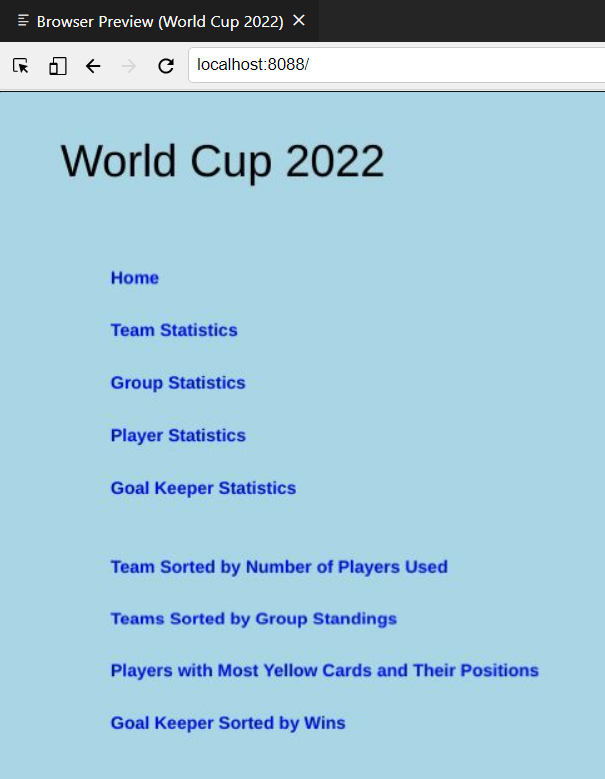

Team Statistics: 

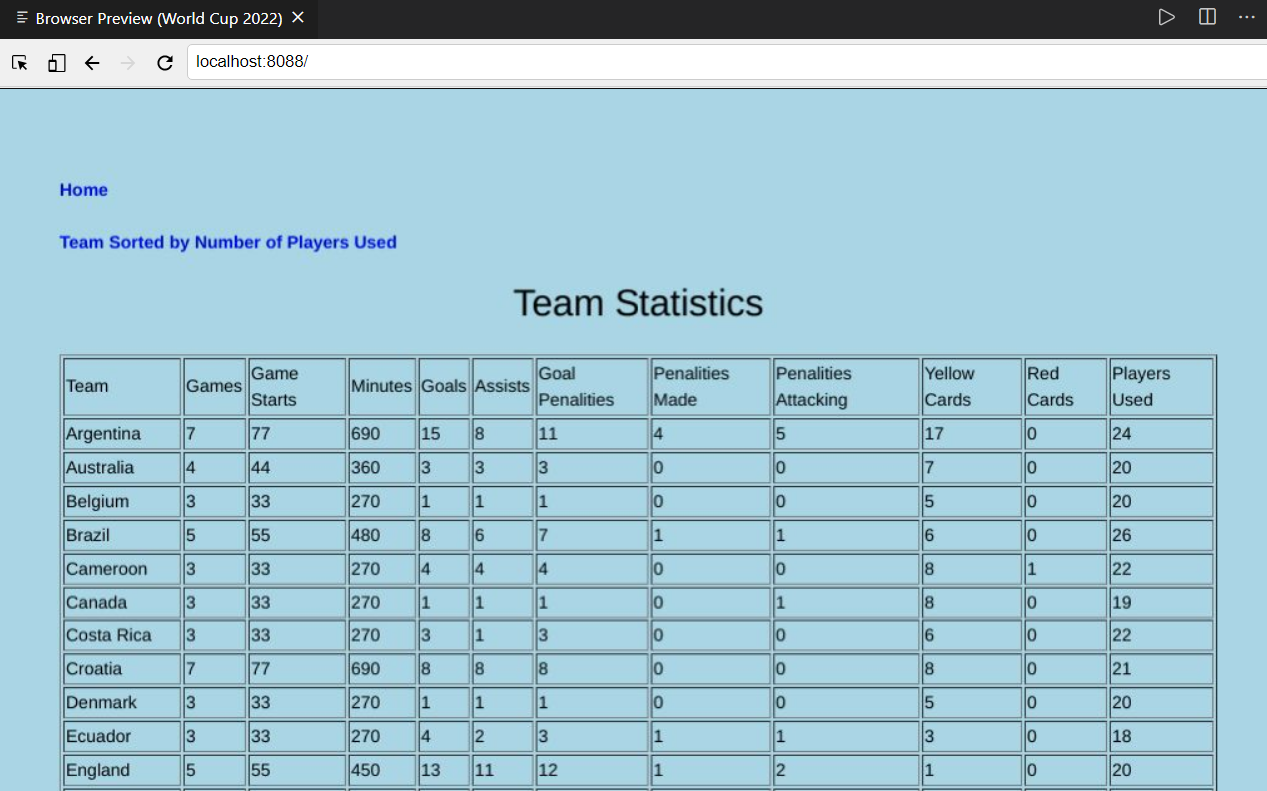

Teams Sorted by Number of Players Used:

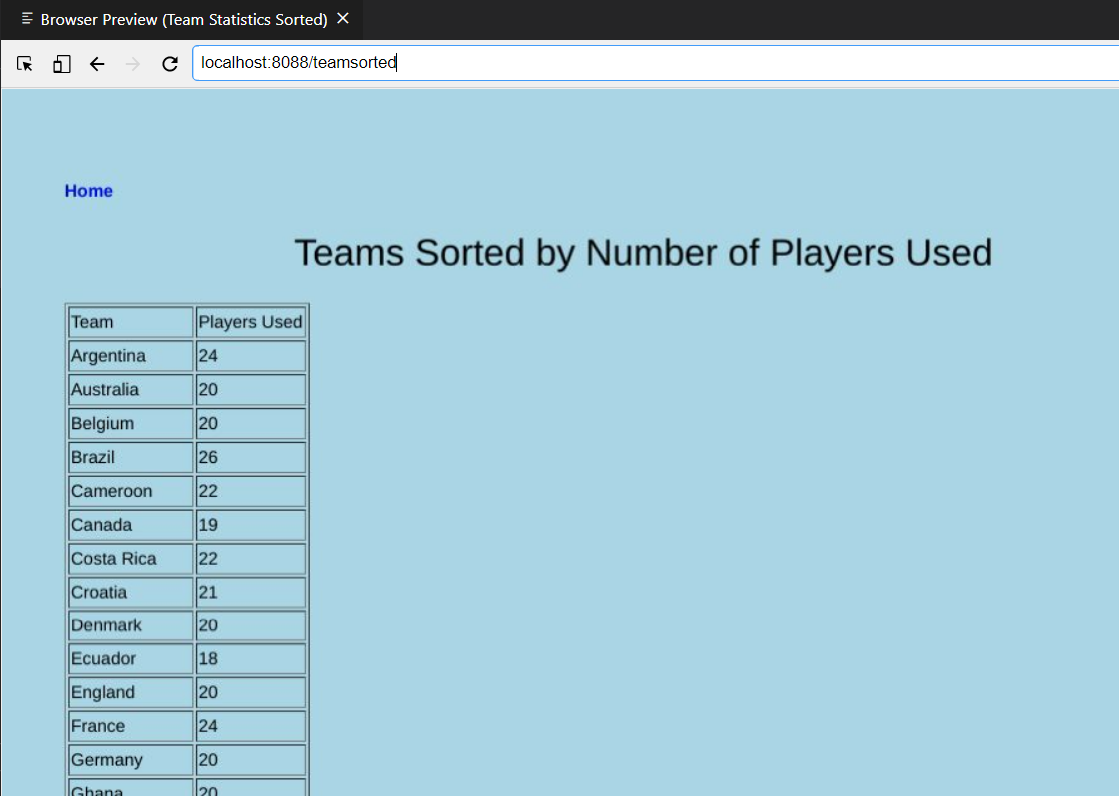

Group Statistics:

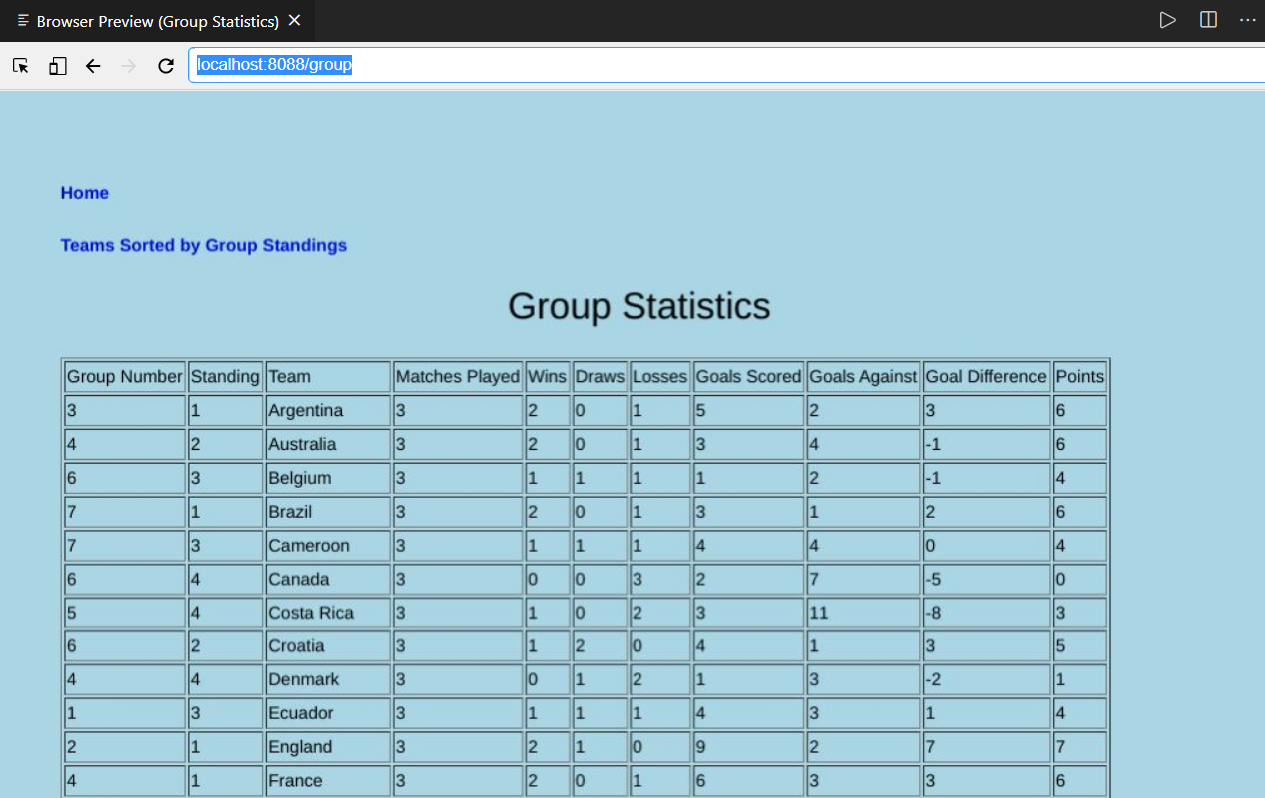

Team Sorted by Group Standings: 

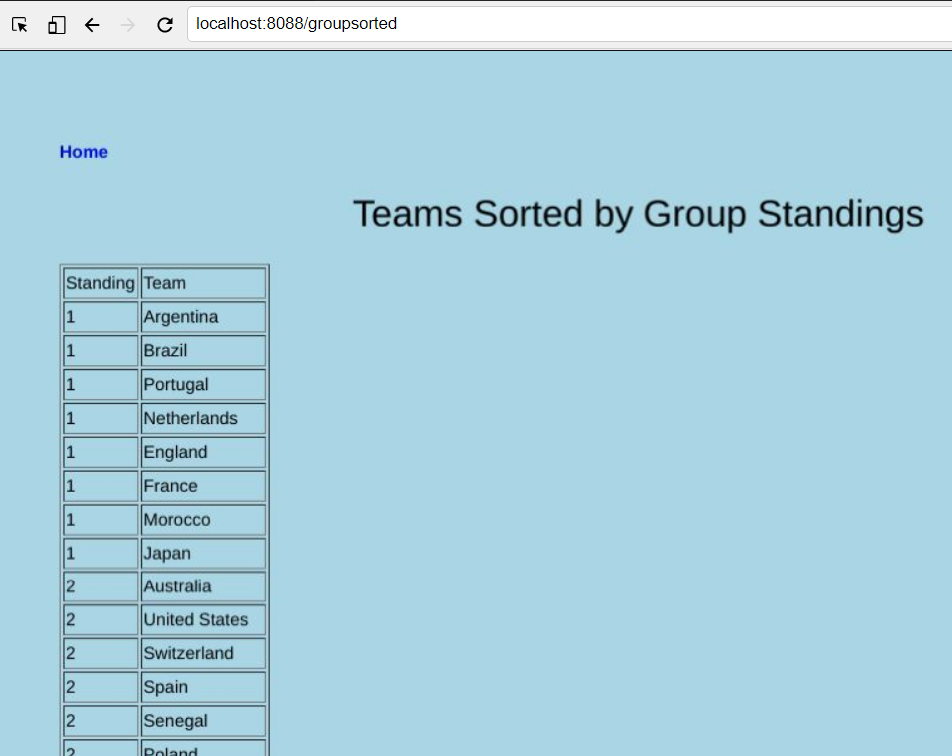

Player Statistics:

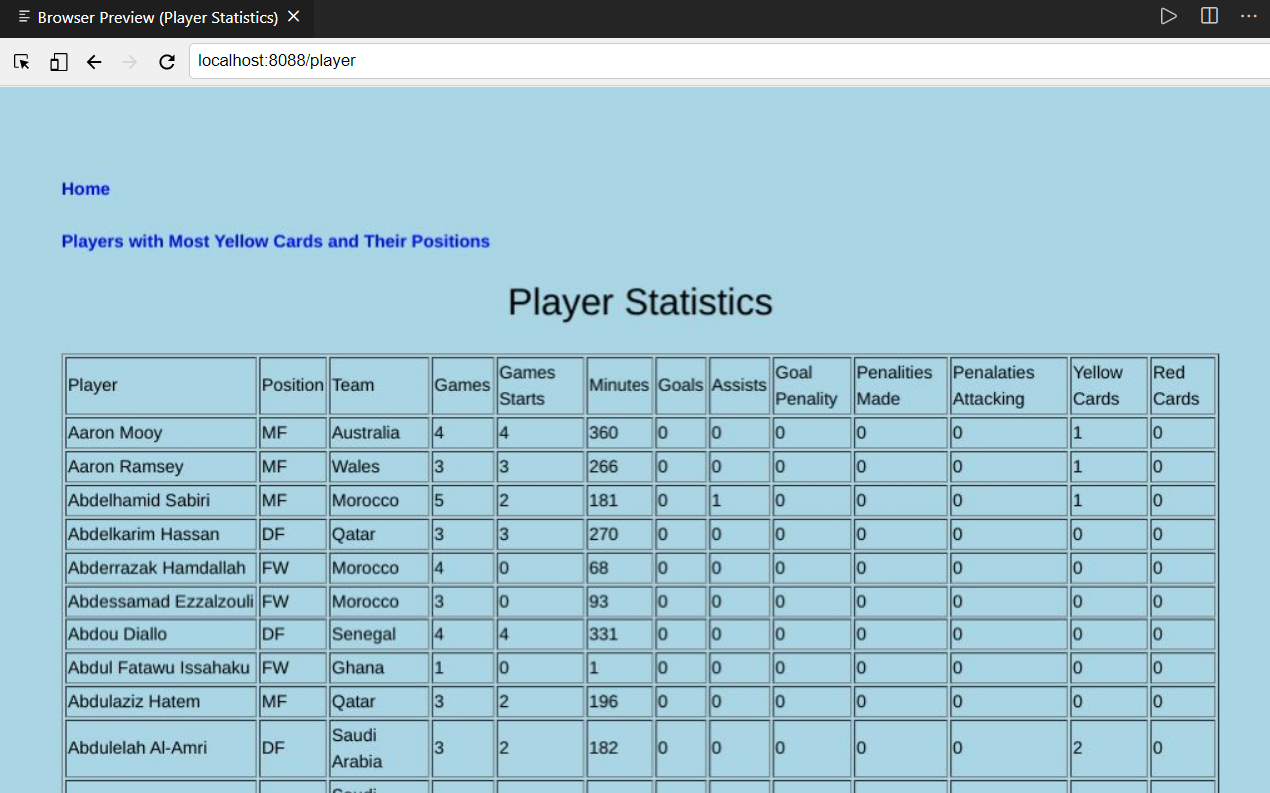

Players with Most Yellow Cards and Their Positions:

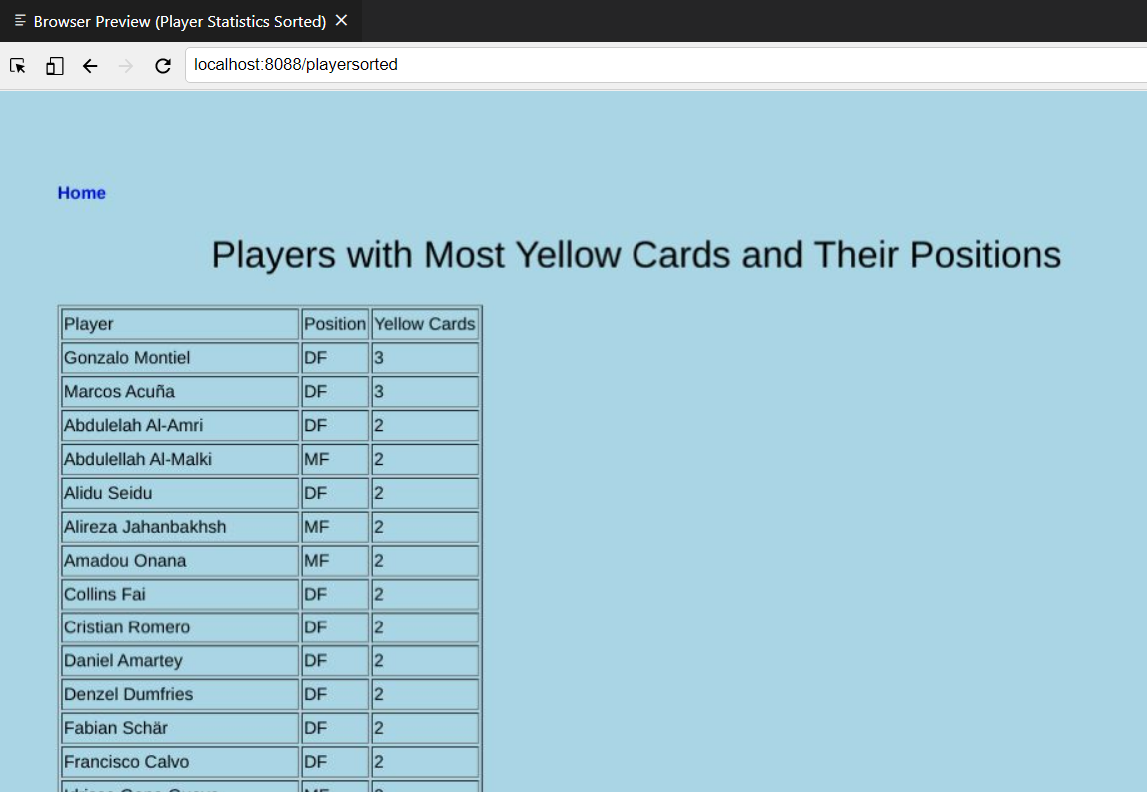

Goal Keeper Statistics: 

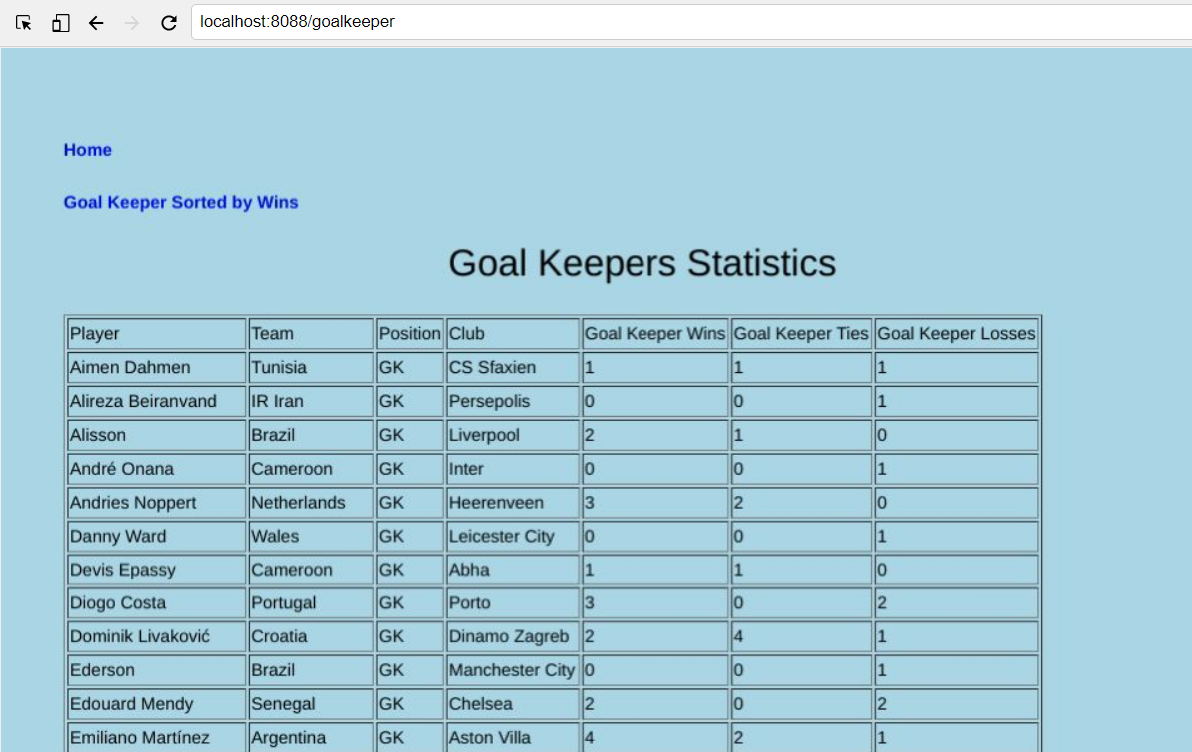

Goal Keeper Sorted by Wins:

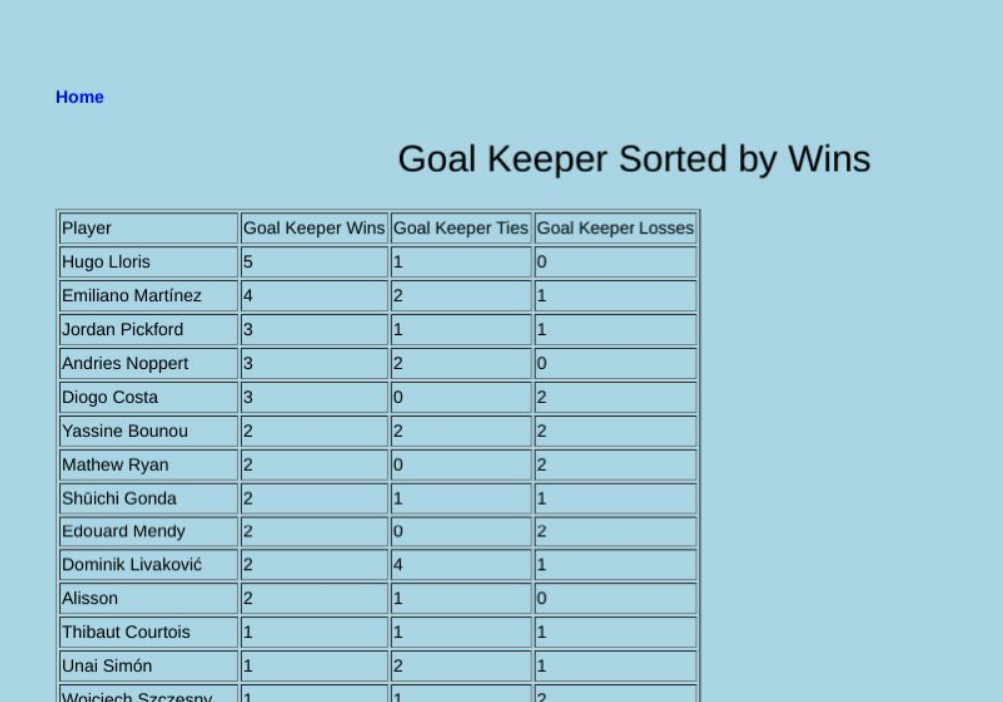

As you can see, in the web application, I did some data analysis as well and it verified my findings found earlier through the data visualization. The analysis above definitely taught me a lot about football and different teams and what are their strengths and weaknesses. However, I would have loved to craft a more in depth analysis. In a future project, I will definitely explore these datasets with more details and depth project. 

## 7 References

[1] https://en.wikipedia.org/wiki/2022_FIFA_World_Cup

[2] https://www.espn.com/soccer/fifa-world-cup/story/4627307/2022-world-cup-finals-bracket-and-fixtures-schedule

[3] https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-statistics

[4] https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-match-data

[5] https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-player-data

[6] https://fbref.com/en/comps/1/schedule/World-Cup-Scores-and-Fixtures

